# 11과 이변량분석 종합실습

## 환경준비

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [55]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [56]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

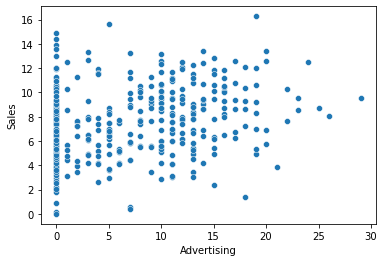

In [57]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

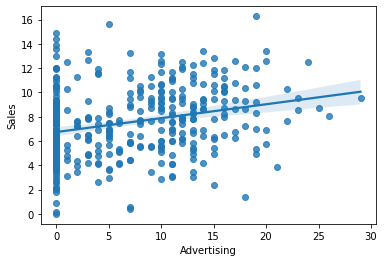

In [58]:
sns.regplot(x=var, y = target, data = data)
plt.show()

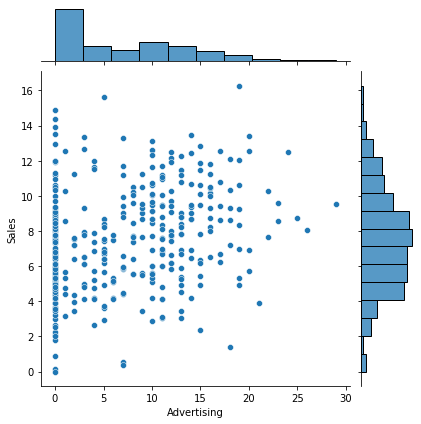

In [59]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [60]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2695067813769019, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

양의 상관관계가 있다. 그러나 강하지는 않다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

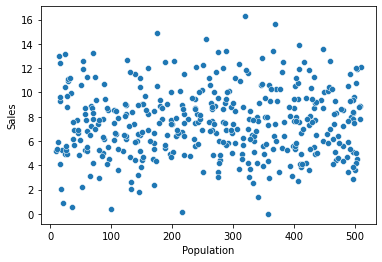

In [61]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

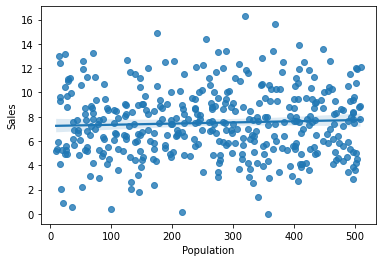

In [62]:
sns.regplot(x=var, y = target, data = data)
plt.show()

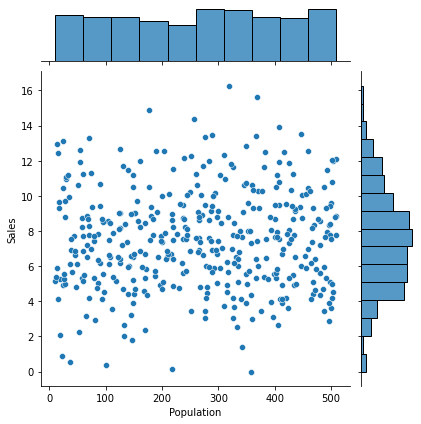

In [63]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [64]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.050470984472039196, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 관련이 없다.
* 근데, 인구수가 많으면 판매량이 늘어나는것 아닐까? 왜 관련이 없지?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

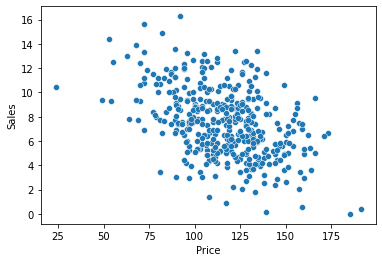

In [65]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

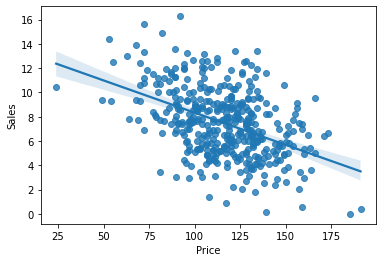

In [66]:
sns.regplot(x=var, y = target, data = data)
plt.show()

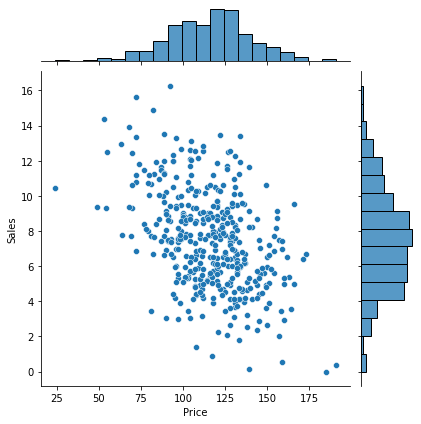

In [67]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [68]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.44495072784657264, p-value : 7.618187011912723e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

음의 상관관계가 있다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

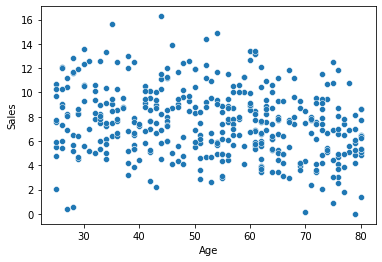

In [69]:
var = 'Age'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

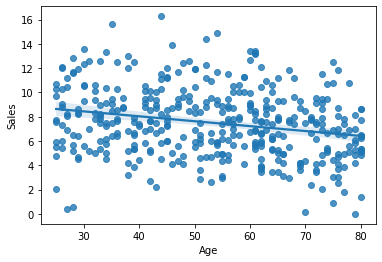

In [70]:
sns.regplot(x=var, y = target, data = data)
plt.show()

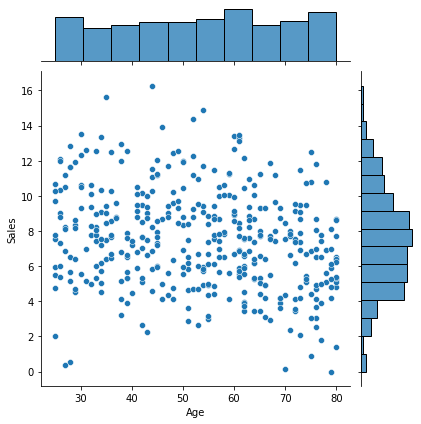

In [71]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [72]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.23181543960457665, p-value : 2.788949839371276e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 연령대(평균연령이 높아질 수록 판매량이 낮아진다.) 관련이 있다. 그러나 강하지 않다.
* 강하지 않은 이유가 무엇일까? 카시트를 필요로 하는 연령대가 있을텐데...

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

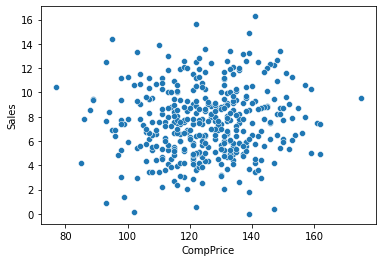

In [73]:
var = 'CompPrice'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

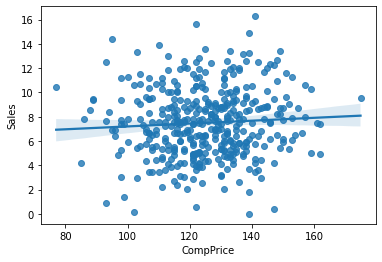

In [74]:
sns.regplot(x=var, y = target, data = data)
plt.show()

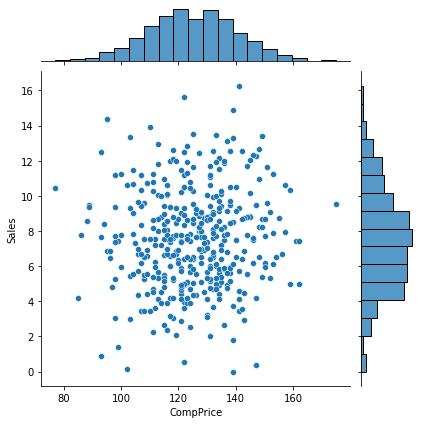

In [75]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [76]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062151, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 가격경쟁력 변수 추가~!!!

In [79]:
data['Price_diff'] = data['CompPrice'] - data['Price']

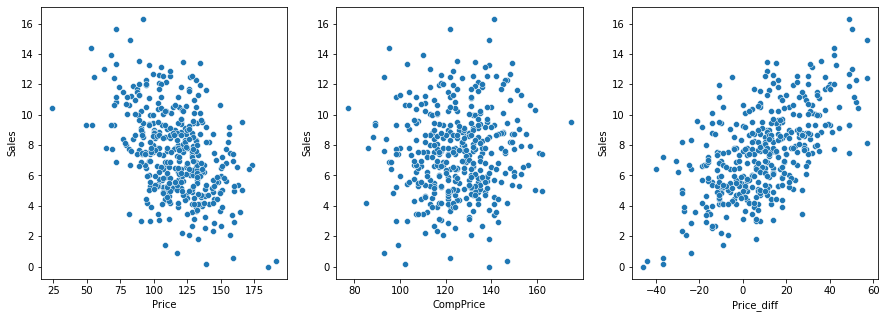

In [80]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Price', y = target, data = data)
plt.subplot(1,3,2)
sns.scatterplot(x='CompPrice', y = target, data = data)
plt.subplot(1,3,3)
sns.scatterplot(x='Price_diff', y = target, data = data)
plt.show()

In [81]:
spst.pearsonr(data['Price'], data[target])

(-0.44495072784657264, 7.618187011912723e-21)

In [82]:
spst.pearsonr(data['CompPrice'], data[target])

(0.06407872955062151, 0.2009398289418295)

In [83]:
spst.pearsonr(data['Price_diff'], data[target])

(0.597921712453392, 3.877120641788946e-40)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

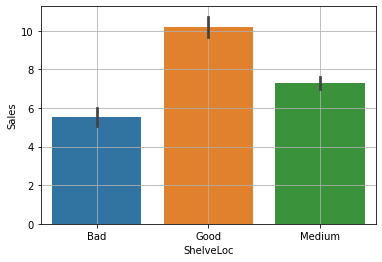

In [77]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [25]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

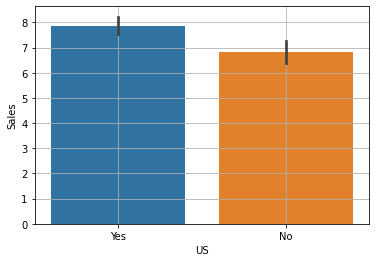

In [78]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [27]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.ttest_ind(d_y, d_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) 관계 정리하기

① 강한관계

In [ ]:
# ShelveLoc, Price_diff

② 중간관계

In [ ]:
# US, Price, Age, Advertising

③ 관계없음

In [ ]:
# ComPrice, Population

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [28]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [30]:
feature = 'Age'

1) 그래프 : histogram, densityplot

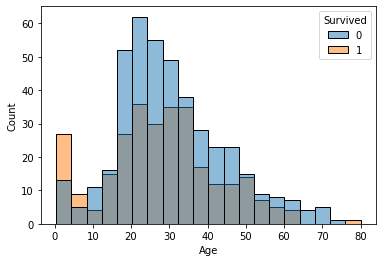

In [31]:
sns.histplot(x=feature, data = titanic, hue = target)
plt.show()

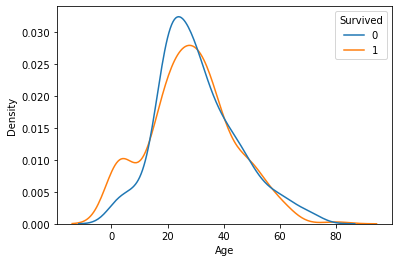

In [32]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [33]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
temp = titanic.loc[titanic[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

In [34]:
feature = 'Fare'

1) 그래프 : histogram, densityplot

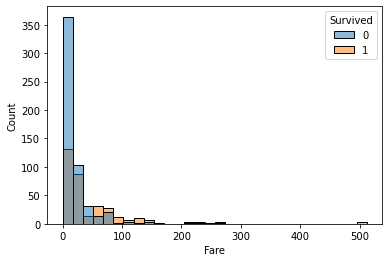

In [35]:
sns.histplot(x=feature, data = titanic, hue = target, bins = 30)
plt.show()

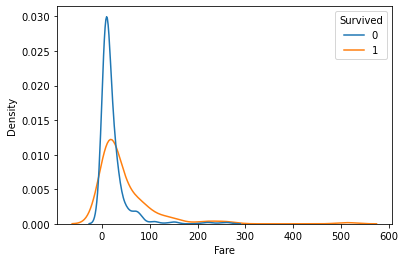

In [36]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [37]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic[target], titanic[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [38]:
feature = 'Sex'

1) 교차표(pd.crosstab())

In [39]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


2) 시각화( Stacked Bar, Mosaic)

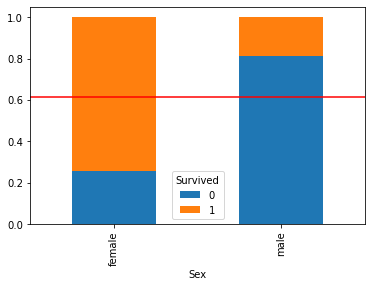

In [40]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

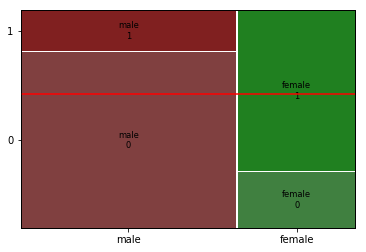

In [41]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [42]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58


4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

In [43]:
feature = 'Pclass'

1) 교차표(pd.crosstab())

In [44]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


2) 시각화( Stacked Bar, Mosaic)

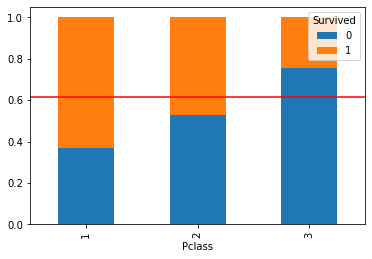

In [45]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

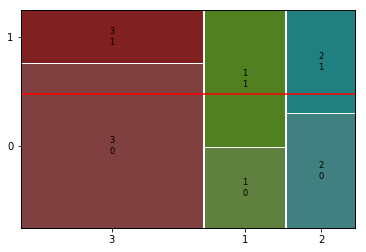

In [46]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [47]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23


4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

In [48]:
feature = 'Embarked'

1) 교차표(pd.crosstab())

In [49]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


2) 시각화( Stacked Bar, Mosaic)

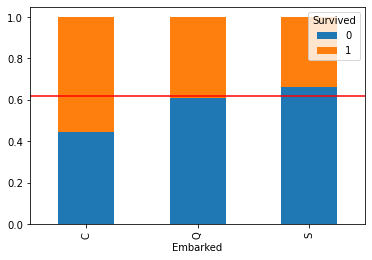

In [50]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

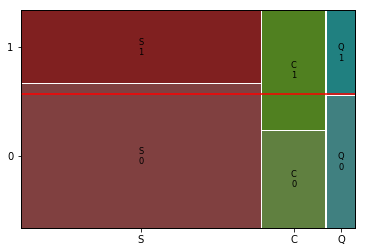

In [51]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [52]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06


4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음